In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# preprocessing
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# model tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# class imbalance
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# evaluating models
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# the ultimate
import xgboost as xgb

df = pd.read_csv('preprocessed_cutomer_data.csv',index_col=0)
extra_features = pd.read_csv('new_features.csv')

In [27]:
# what about ploynomials and interactions

## Training

In [35]:

X = df.drop(columns=['churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=10)

## Scaling & dealing with class imbalance

In [43]:
scaler = StandardScaler()
X_train_scaled = pdscaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[ 0.18407677,  0.2745049 , -0.52216534, ..., -0.61013012,
         2.52872933,  0.31370742],
       [-1.36726933,  2.45439144, -0.52216534, ..., -1.02400502,
        -0.79976967, -1.18812177],
       [-0.22062221,  0.3496734 ,  1.72210763, ..., -1.02400502,
         0.2080627 ,  0.31370742],
       ...,
       [ 0.52132592, -0.85302262, -0.68753282, ...,  3.11474406,
        -0.12346111,  0.31370742],
       [ 0.31897643, -0.32684311,  1.72210763, ...,  2.28699424,
        -0.86607443,  1.06462201],
       [-0.4229717 , -0.67762945, -0.52216534, ..., -0.19625521,
        -0.75998682, -1.18812177]])

In [ ]:
dont forget to apply your scaler to the X_test set 

In [37]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           n_estimators = 100)

In [44]:
xg_clf.fit(X_train_scaled,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
preds = xg_clf.predict(X_test_scaled)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.918465
F1: 0.626374


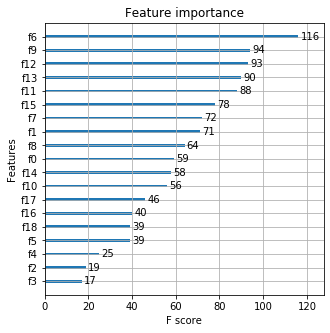

In [46]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()